# Proyecto Herramientas II - Grupo Optimización

Primeramente se presentan las librerías que se utilizaron y que son necesarias para ejecutar el código. Se deja como comentarios la instalación de las mismas por si alguien ocupara instalar alguna.

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install numexpr
# !pip install numba
# !pip install matplotlib
# !pip install seaborn
# !pip install joblib
# !pip install IPython

In [2]:
# Se cargan las librerías más comúnes que se van a usar
import numpy as np
import pandas as pd
import time
import timeit # La librería timeit no requiere ser instalada

Se usó la librería timeit para determinar el tiempo de ejecución de los ejercicios.

Referencias:

https://docs.python.org/es/3/library/timeit.html

https://www.geeksforgeeks.org/timeit-python-examples/

## Ejercicio 1: Operaciones matriciales

In [3]:
# Se crea la matriz con la que se va a trabajar
matriz = np.random.rand(10_000, 10_000)

In [4]:
# Ahora se realizará el ejercicio usando la librería NumExpr
import numexpr as ne

# Se crea un string con el código que se quiere ejecutar
codigo = """
resultado = ne.evaluate('(matriz ** 100) * 10 + 5')
"""

# Se ejecuta el código 10 veces usando timeit y se almacenan los tiempos en una lista
tiempo_total = timeit.timeit(stmt = codigo, number = 10, globals = globals())

# Se calcula el tiempo promedio
tiempo_promedio = tiempo_total / 10

tiempo_promedio

0.6592364800046198

In [5]:
# Seguidamente se hace lo mismo usando la librería Numba
import numba as nb

# Se crea una función que realice la operación que queramos, agregándole decoradores para que numba compile esta función de manera eficiente 
@nb.njit(parallel = True)
def operacion(matriz):
    
    matriz_resultado = np.empty_like(matriz)
    
    for i in nb.prange(matriz.shape[0]):
        
        for j in range(matriz.shape[1]):
            
            matriz_resultado[i, j] = (matriz[i, j] ** 100) * 10 + 5
            
    return matriz_resultado

codigo_ej_1 = """
resultado = operacion(matriz)
"""

tiempo_total_ej_1 = timeit.timeit(stmt = codigo_ej_1, number = 10, globals = globals())

tiempo_promedio_ej_1 = tiempo_total_ej_1 / 10

tiempo_promedio_ej_1

0.2113052499946207

In [6]:
# Por último, se crea un dataframe con el tiempo promedio (en segundos) obtenido por cada uno de los integrantes usando cada librería

data_ej_1 = {

    'integrante': ['Eyeri', 'Alejandro', 'Santiago', 'Paula'],

    'numexpr': [0.615, 2.387, 0.34238, 2.347],

    'numba': [0.2218, 0.733, 0.24621, 0.465]
    
}

tiempos_ej_1 = pd.DataFrame(data_ej_1)
tiempos_ej_1

,integrante,numexpr,numba
0,Eyeri,0.61500,0.22180
1,Alejandro,2.38700,0.73300
2,Santiago,0.34238,0.24621
3,Paula,2.34700,0.46500


## Ejercicio 2: Limpieza de bases de datos

In [7]:
import pandas as pd
import numpy as np
import timeit

muertes_cr = pd.read_excel('data/Muertes_costa_rica.xlsx',
                               engine = 'openpyxl')

copia_muertes = muertes_cr.copy()

def limpiar_datos():

    global muertes_cr

    muertes_cr = copia_muertes.copy()
    
    muertes_cr = muertes_cr.drop(columns = ['pc', 'causamuer', 'des_causa', 'instmurio', 'pcocu', 'nacmadre', 'pcregis', 'gruposcb'])
    
    # Se realiza la limpieza de la base de datos
    
    muertes_cr = muertes_cr[muertes_cr['edads'] >= 15]
    
    muertes_cr = muertes_cr[muertes_cr['anodef'] >= 2014]
    
    muertes_cr = muertes_cr[muertes_cr['anotrab'] >= 2014]
    
    muertes_cr = muertes_cr[muertes_cr['anodeclara'] >= 2014]
    
    muertes_cr['estcivil'] = muertes_cr['estcivil'].str.replace("Ã³", "o")
    
    muertes_cr['ocuparec'] = muertes_cr['ocuparec'].str.replace("Ã¡", "a")
    
    muertes_cr['ocuparec'] = muertes_cr['ocuparec'].str.replace("Ã©", "e")
    
    muertes_cr['ocuparec'] = muertes_cr['ocuparec'].str.replace("Ã", "i")
    
    muertes_cr['regsalud'] = muertes_cr['regsalud'].str.replace("Ã\xad", "i")
    
    muertes_cr['regsalud'] = muertes_cr['regsalud'].str.replace("Ã³", "o")
    
    muertes_cr['provincia'] = muertes_cr['provincia'].str.replace("Ã©", "e")
    
    muertes_cr['provincia'] = muertes_cr['provincia'].str.replace("Ã³", "o")
    
    muertes_cr['provocu'] = muertes_cr['provocu'].str.replace("Ã©", "e")
    
    muertes_cr['provocu'] = muertes_cr['provocu'].str.replace("Ã³", "o")
    
    muertes_cr['provregis'] = muertes_cr['provregis'].str.replace("Ã©", "e")
    
    muertes_cr['provregis'] = muertes_cr['provregis'].str.replace("Ã³", "o")
    
    muertes_cr['reginec'] = muertes_cr['reginec'].str.replace("Ã\xad", "i")
    
    muertes_cr['reginec'] = muertes_cr['reginec'].str.replace("Ã³", "o")
    
    muertes_cr['edadsrec'] = muertes_cr['edadsrec'].str.replace("100 y mÃ¡s", "100 - 121")
    
    muertes_cr['autopsia'] = muertes_cr['autopsia'].str.replace("Ã©", "e")
    
    muertes_cr['autopsia'] = muertes_cr['autopsia'].str.replace("Ã\xad", "i")
    
    muertes_cr['asistmed'] = muertes_cr['asistmed'].str.replace("Ã©", "e")
    
    muertes_cr['asistmed'] = muertes_cr['asistmed'].str.replace("Ã\xad", "i")
    
    muertes_cr['nacionalid'] = muertes_cr['nacionalid'].apply(lambda x: 'Extranjero' if x != 'Costa Rica' else x)
    
    otros = ['Ignorado', 'Union libre', 'Separado', 'Menor']
    
    muertes_cr['estcivil'] = muertes_cr['estcivil'].replace(otros, 'Otros')
    
    trabajadores_activos = ['Profesionales cienti\xadficos e intelectuales', 
                            'Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros',
                            'Ocupaciones elementales', 'Trabajadores de los servicios y vendedores de comercios y mercados',
                            'Operadores de instalaciones y maquinas y ensambladores', 'Tecnicos y profesionales de nivel medio',
                            'Oficiales, operarios y artesanos de artes mecanicas y de otros oficios', 'Personal de apoyo administrativo',
                            'Directores y gerentes']
    
    muertes_cr['ocuparec'] = muertes_cr['ocuparec'].replace(trabajadores_activos, 'Trabajadores activos')
    
    otros = ['Pensionado', 'Persona con discapacidad', 'Estudiante', 'Mal especificadas', 'Privado de libertad']
    
    muertes_cr['ocuparec'] = muertes_cr['ocuparec'].replace(otros, 'Otros')
    
    rangos_etarios = ["15 - 19", "20 - 24", "25 - 29", "30 - 34", "35 - 39", "40 - 44", "45 - 49", 
                      "50 - 54", "55 - 59", "60 - 64", "65 - 69", "70 - 74", "75 - 79", "80 - 84", 
                      "85 - 89", "90 - 94", "95 - 99", "100 - 121"]
    
    muertes_cr['edadsrec'] = pd.Categorical(muertes_cr['edadsrec'], categories = rangos_etarios, ordered = True)
    
    muertes_cr.reset_index(drop = True, inplace = True)
    
    return muertes_cr

tiempo_total_ej_2 = timeit.timeit(stmt = limpiar_datos, number = 10)

tiempo_promedio_ej_2 = tiempo_total_ej_2 / 10

tiempo_promedio_ej_2

0.8463665399933233

In [8]:
data_ej_2 = {

    'integrante': ['Alejandro', 'Eyeri', 'Santiago', 'Paula'],

    'tiempo_promedio': [2.288, 0.8281, 0.79793, 1.972]
    
}

tiempos_ej_2 = pd.DataFrame(data_ej_2)
tiempos_ej_2

,integrante,tiempo_promedio
0,Alejandro,2.28800
1,Eyeri,0.82810
2,Santiago,0.79793
3,Paula,1.97200


## Ejercicio 3: Gráficos en paralelo 

Primeramente se usa joblib para paralelizar la generación de los histogramas y de los gráficos de barras, por medio de los componentes Parallel y delayed

Referencias:

https://joblib.readthedocs.io/en/latest/parallel.html

https://joblib.readthedocs.io/en/latest/generated/joblib.Parallel.html

También se hace uso de la función clear_output del módulo IPython, con el fin de limpiar la salida de la celda y no mostrar todos los gráficos
generados cada vez que se ejecuta la función de generar gráficos

Referencias:

https://stackoverflow.com/questions/24816237/ipython-notebook-clear-cell-output-in-code

https://notebook.community/CestDiego/emacs-ipython-notebook/tests/notebook/nbformat4/Animations%20Using%20clear_output

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Parallel, delayed
from IPython.display import clear_output

# Se define una función que realice los histogramas para las variables numéricas
def histograma(df, columna):
    
    plt.figure()
    
    sns.histplot(df[columna], bins = 'auto', color = 'blue', edgecolor = 'black')
    
    plt.xlabel('Valor')
    
    plt.ylabel('Frecuencia')
    
    return plt.gcf()

# Se define otra función que haga los gráficos de barras para las variables categóricas
def barras(df, columna):
    
    plt.figure()
    
    sns.countplot(x = columna, data = df, color = 'red')

    plt.xticks(rotation = 45)
    
    plt.xlabel('Categorías')
    
    plt.ylabel('Cantidad')
    
    return plt.gcf()

# Definimos una función que devuelve las columnas numéricas y categóricas en listas por aparte
def tipos_columnas(df):
    
    numericas = df.select_dtypes(include = ['number']).columns
        
    categoricas = df.select_dtypes(include = ['object', 'category']).columns

    return numericas, categoricas

# Obtenemos las variables numericas y categóricas
numericas, categoricas = tipos_columnas(muertes_cr)

# Definimos una función que genere los gráficos deseados
def generar_graficos(limpiar = True):

    # Generamos y guardamos los gráficos tanto de histogramas como de barras usando la paralelización de joblib
    histogramas = Parallel(n_jobs = -1)(
    
        delayed(histograma)(muertes_cr, col) for col in numericas
    
    )

    graficos_barras = Parallel(n_jobs = -1)(
    
        delayed(barras)(muertes_cr, col) for col in categoricas
    
    )

    # Mostramos los gráficos
    for grafico in histogramas + graficos_barras:

        plt.show()

    # Si el parámetro limpiar es True, no se mostrarán los gráficos
    if limpiar:

        clear_output()

# Así, se mide el tiempo que tarda la función al ejecutarla 10 veces
tiempo_ejecucion_ej_3 = timeit.timeit(generar_graficos, number = 10)

# Se obtiene el tiempo promedio de las 10 ejecuciones
tiempo_promedio_ej_3 = tiempo_ejecucion_ej_3 / 10
tiempo_promedio_ej_3

9.113617509999312

In [10]:
# Por último, se crea un dataframe con el tiempo promedio que tardó la función por cada integrante
data_ej_3 = {

    'integrante': ['Eyeri', 'Alejandro', 'Santiago', 'Paula'],

    'tiempo_promedio': [8.28, 9.71, 8.3582, 17.071]
    
}

tiempos_ej_3 = pd.DataFrame(data_ej_3)
tiempos_ej_3

,integrante,tiempo_promedio
0,Eyeri,8.2800
1,Alejandro,9.7100
2,Santiago,8.3582
3,Paula,17.0710


## Ejercicio 4: Media móvil 

In [11]:
import pandas as pd
import numpy as np
from numba import njit, prange

@njit(parallel = True)
def imputar_valores_nulos(data, banda):
    
    n = len(data)
    
    resultado = data.copy()
    
    for i in prange(n):
        
        if np.isnan(data[i]):
            
            principio = max(0, i - banda)
            
            final = min(n, i + banda + 1)
            
            suma, cuenta = 0.0, 0
            
            for j in range(principio, final):
                
                if not np.isnan(data[j]):
                    
                    suma += data[j]
                    
                    cuenta += 1
                    
            if cuenta > 0:
                
                resultado[i] = suma / cuenta
                
    return resultado

def imputar_por_prom_movil(dataframe, columna, banda):

    data = dataframe[columna].values
    
    data_imputado = imputar_valores_nulos(data, banda)
    
    dataframe[columna] = data_imputado
    
    return dataframe

In [12]:
base_salarios = pd.read_excel('data/Base_salarios.xlsx',
                               engine = 'openpyxl')

codigo_ej_4 = """
resultado = imputar_por_prom_movil(base_salarios, 'Salario base', 4)
"""

tiempo_total_ej_4 = timeit.timeit(stmt = codigo_ej_4, number = 10, globals = globals())

tiempo_promedio_ej_4 = tiempo_total_ej_4 / 10

tiempo_promedio_ej_4

0.03470034000929445

In [13]:
data_ej_4= {

    'integrante': ['Alejandro', 'Eyeri', 'Santiago', 'Paula'],

    'tiempo_promedio': [0.053, 0.03388, 0.0553, 0.1978]

}

tiempos_ej_4 = pd.DataFrame(data_ej_4)
tiempos_ej_4

,integrante,tiempo_promedio
0,Alejandro,0.05300
1,Eyeri,0.03388
2,Santiago,0.05530
3,Paula,0.19780


## Ejercicio 5: Eliminar columnas por porcentaje de valores nulos

In [14]:
import pandas as pd

def eliminar_columnas_por_nulos(df, porcentaje):
    
    # Calculamos el número máximo de valores nulos permitidos
    max_nulos = len(df) * porcentaje
    
    # Filtramos las columnas que tienen menos de max_nulos valores nulos
    df_filtrado = df.dropna(axis=1, thresh=len(df) - max_nulos)
    
    return df_filtrado

In [15]:
base_salarios = pd.read_excel('data/Base_salarios.xlsx',
                               engine = 'openpyxl')

codigo_ej_5 = """
base_salarios_filtrada = eliminar_columnas_por_nulos(base_salarios, 0.01)
"""

tiempo_total_ej_5 = timeit.timeit(stmt = codigo_ej_5, number = 10, globals = globals())

tiempo_promedio_ej_5 = tiempo_total_ej_5 / 10

tiempo_promedio_ej_5

0.002107120002619922

In [16]:
data_ej_5 = {

    'integrante': ['Alejandro', 'Eyeri', 'Santiago', 'Paula'],
    
    'tiempo_promedio': [0.0071, 0.0019, 0.0035, 0.0075]
    
}

tiempos_ej_5 = pd.DataFrame(data_ej_5)
tiempos_ej_5

,integrante,tiempo_promedio
0,Alejandro,0.0071
1,Eyeri,0.0019
2,Santiago,0.0035
3,Paula,0.0075


## Ejercicio 6: Imputacion por agrupación

In [17]:
base_salarios = pd.read_excel('data/Base_salarios.xlsx',
                               engine = 'openpyxl')

# Función para imputar valores nulos por agrupación
def imputar_por_agrupacion():
    
    # Imputación utilizando pandas
    base_salarios['Salario base'] = base_salarios.groupby(['Género', 'Grado de estudio'])['Salario base'] \
                           .transform(lambda x: x.fillna(x.mean()))
    
    return base_salarios

In [18]:
# Así, se mide el tiempo que tarda la función al ejecutarla 10 veces
tiempo_total_ej_6 = timeit.timeit(imputar_por_agrupacion, number = 10)

# Se obtiene el tiempo promedio de las 10 ejecuciones
tiempo_promedio_ej_6 = tiempo_total_ej_6 / 10
tiempo_promedio_ej_6

0.019992859999183564

In [19]:
data_ej_6 = {

    'integrante': ['Alejandro', 'Eyeri', 'Santiago', 'Paula'],
    
    'tiempo_promedio': [0.0668, 0.0224, 0.02082, 0.0515]
    
}

tiempos_ej_6 = pd.DataFrame(data_ej_6)
tiempos_ej_6

,integrante,tiempo_promedio
0,Alejandro,0.06680
1,Eyeri,0.02240
2,Santiago,0.02082
3,Paula,0.05150


## Ejercicio 7: Producto acumulado

In [20]:
class ProductoAcumulado:
    
    def __init__(self, lista):
        
        self.__lista = np.array(lista)
    
    def calcular_producto_acumulado(self):
        
        return np.cumprod(self.__lista)

lista = [99, 9, 9, 4, 5, 81, 99]

ejemplo = ProductoAcumulado(lista)

ejemplo.calcular_producto_acumulado()

array([        99,        891,       8019,      32076,     160380,
         12990780, 1286087220])

In [21]:
# Variante con Numba
from numba import jit

class ProductoAcumulado:
    
    def __init__(self, lista):
        
        self.__lista = np.array(lista)
    
    def calcular_producto_acumulado(self):
            
        return self._producto_acumulado(self.__lista)

    @staticmethod
    @jit(nopython = True)
    def _producto_acumulado(array):
        
        result = np.ones_like(array)
        
        result[0] = array[0]
        
        for i in range(1, len(array)):
            
            result[i] = result[i - 1] * array[i]
        
        return result

lista = [1, 2, 3, 4, 3, 12]

ejemplo = ProductoAcumulado(lista)

ejemplo.calcular_producto_acumulado()

array([  1,   2,   6,  24,  72, 864])

## Ejercicio 8: Cambiar letras en un texto

In [22]:
class CambiadorDeCaracteres:
    
    def __init__(self, cadena):
        
        self.__cadena = cadena
    
    def cambiar_caracter(self, caracter_viejo, caracter_nuevo):
        
        cadena_mod = self.__cadena.replace(caracter_viejo, caracter_nuevo)
        
        return cadena_mod
    
    def desplazar_letras(self, n):
        
        desplazada = []
        
        for char in self.__cadena:
            
            if char.isalpha():
                
                start = ord('a') if char.islower() else ord('A')
                
                desplazada.append(chr(start + (ord(char) - start + n) % 26))
                
            else:
                
                desplazada.append(char)
                
        cadena_desplazada = ''.join(desplazada)
        
        return cadena_desplazada

# Ejemplo
cadena = "Hola mundo"

cambiador = CambiadorDeCaracteres(cadena)

nueva_cadena = cambiador.cambiar_caracter('o', '0')
print(nueva_cadena)  # H0la mund0

cadena_desplazada = cambiador.desplazar_letras(2)
print(cadena_desplazada) # Jqnc oqpfq (siendo cada letra desplazada 2 espacios a la derecha)

H0la mund0
Jqnc owpfq


In [24]:
# Variante del ejercicio
class CambiadorDeCaracteres:
    
    def __init__(self, cadena):
        
        self.__cadena = cadena
    
    def cambiar_caracter(self, caracter_viejo, caracter_nuevo):
        
        cadena_mod = self.__cadena.replace(caracter_viejo, caracter_nuevo)
        
        return cadena_mod
    
    def desplazar_letras(self, n):
        
        arr = np.array(list(self.__cadena))
        desplazada = []

        for char in arr:
            
            if char.isalpha():
                
                start = ord('a') if char.islower() else ord('A')
                
                new_char = chr(start + (ord(char) - start + n) % 26)
                
                desplazada.append(new_char)
                
            else:
                
                desplazada.append(char)

        cadena_desplzada = ''.join(desplazada)
        
        return cadena_desplazada

# Ejemplo
cadena = "Hola mundo"

cambiador = CambiadorDeCaracteres(cadena)

nueva_cadena = cambiador.cambiar_caracter('o', '0')
print(nueva_cadena)

cadena_desplazada = cambiador.desplazar_letras(2)
print(cadena_desplazada)

H0la mund0
Jqnc owpfq


## Ejercicio 9: Regresión logística

In [25]:
from numba import jit

@jit(nopython = True)
def funcion_sigmoide(z):

    '''
    Función que le aplica la función sigmoide al parámetro dado.
    Esta función matemática lo que hace es convertir un valor real en un valor
    en el intervalo [0, 1]. Es comúnmente utilizada como función de activación 
    en modelos de regresión logística y redes neuronales.

    Parámetros:
    ----------
    z: numpy.ndarray
       escalar, vector o matriz a la que se le quiere aplicar la función sigmoide
       

    Retorna:
    -------
    numpy.ndarray
        escalar, vector o matriz resultante después de aplicarle la función sigmoide
        al elemento o a los elementos del parámetro dado 
    '''
    
    return 1 / (1 + np.exp(-z)) # Se calcula el resultado de la función sigmoide 
                                # evaluada en el elemento o los elementos del parámetro dado

@jit(nopython = True)
def propagacion_adelante(W, b, X):

    '''
    Función que realiza la propagación hacia adelante de un modelo de regresión logística.
    En este proceso se combinan las características de entrada con los pesos del modelo y 
    se aplica una función de activación (en este caso, la función sigmoide) para obtener 
    las predicciones del modelo.

    Parámetros:
    ----------
    W: numpy.ndarray
       matriz de tamaño (1, numero_de_caracteristicas) que contiene los pesos del modelo

    b: float
       sesgo del modelo
    
    X: numpy.ndarray
       matriz de tamaño (numero_de_muestras, numero_de_caracteristicas) que contiene 
       las características de las muestras de entrada

    Retorna:
    -------
    A: numpy.ndarray
       matriz de tamaño (1, numero_de_muestras) que contiene las salidas del 
       modelo después de aplicar la función sigmoide
    '''
    
    Z = np.dot(W, X.T) + b # Se realiza la combinación lineal de las entradas con los pesos y el sesgo
    
    A = funcion_sigmoide(Z) # Se aplica la función sigmoide a lo calculado anteriormente
    
    return A

@jit(nopython = True)
def propagacion_atras(X, A, y):

    '''
    Función que calcula la propagación hacia atrás para actualizar los gradientes.
    Este proceso calcula los gradientes de la función de costo con respecto a los 
    parámetros del modelo (en este caso, los pesos  el sesgo), lo que permite ajustar 
    estos parámetros de manera que el modelo se ajuste mejor a los datos de entrenamiento.

    Parámetros:
    -----------
    X: numpy.ndarray
       matriz de tamaño (numero_de_muestras, numero_de_caracteristicas) que contiene 
       las características de las muestras de entrada

    A: numpy.ndarray
       matriz de tamaño (1, numero_de_muestras) calculada en la propagación hacia adelante,
       que contiene las salidas del modelo después de aplicar la función sigmoide

    y: numpy.ndarray
       vector de tamaño (numero_de_muestras) que contiene las etiquetas verdaderas 
       para las muestras de entrada

    Retorna:
    --------
    dW : numpy.ndarray
         gradiente del costo respecto a los pesos W
         
    db : float
         gradiente del costo respecto al sesgo b
    '''
    
    m = X.shape[0] # Número de muestras
    
    dZ = A - y # Gradiente de la función de activación respecto a la función de costo
    
    dW = np.dot(dZ, X) / m # Se calcula el gradiente del costo con respecto a los pesos W
    
    db = np.sum(dZ) / m # Se calcula el gradiente del costo con respecto al sesgo b
    
    return dW, db

@jit(nopython = True)
def optimizar(W, b, X, y, num_iterations, learning_rate):

    '''
    Función que optimiza los parámetros W y b del modelo de regresión logística mediante el descenso de gradiente.
    El descenso de gradiente es un algoritmo de optimización que consiste en ajustar iterativamente los parámetros 
    de un modelo en la dirección opuesta al gradiente de la función de costo con respecto a los parámetros, 
    lo cual optimiza y, por lo tanto, minimiza dicha función de costo al ajustar de mejor manera estos parámetros.

    Parámetros:
    ----------
    W: numpy.ndarray
       matriz de tamaño (1, numero_de_caracteristicas) que contiene los pesos del modelo

    b: float
       sesgo del modelo
    
    X: numpy.ndarray
       matriz de tamaño (numero_de_muestras, numero_de_caracteristicas) que contiene 
       las características de las muestras de entrada

    y: numpy.ndarray
       vector de tamaño (numero_de_muestras) que contiene las etiquetas verdaderas 
       para las muestras de entrada

    num_iterations: int
                    número de iteraciones del descenso de gradiente

    learning_rate: float
                   tasa de aprendizaje para actualizar los parámetros

    Retorna:
    --------
    params : dict
             diccionario que contiene los parámetros optimizados:
             - "W": Matriz de pesos optimizada
             - "b": Sesgo optimizado
    '''

    # Se itera sobre el número especificado de iteraciones
    for i in range(num_iterations):

        # Se hace la propagación hacia adelante para calcular la activación 
        # y el costo con los parámetros actuales
        A = propagacion_adelante(W, b, X)

        # Se hace la propagación hacia atrás para calcular los gradientes de
        # los parámetros actuales
        dW, db = propagacion_atras(X, A, y)

        # Se actualizan los parámetros (pesos y sesgo) utilizando el descenso de gradiente
        W -= learning_rate * dW
        b -= learning_rate * db
            
    return W, b

@jit(nopython = True)
def predecir(W, b, X):

    '''
    Función que realiza predicciones de clases binarias utilizando los parámetros optimizados.
    El objetivo de este proceso es predecir la pertenencia de las muestras a una de las dos 
    clases posibles. Esto consiste en hacer las predicciones de clase para las muestras en X, 
    donde cada predicción es una asignación binaria en la que se estima si una muestra pertenece 
    a la clase 1 o a la clase 0 basada en la probabilidad calculada por el modelo.

    Parámetros:
    -----------
    W: numpy.ndarray
       matriz de tamaño (1, numero_de_caracteristicas) que contiene los pesos del modelo

    b: float
       sesgo del modelo
    
    X: numpy.ndarray
       matriz de tamaño (numero_de_muestras, numero_de_caracteristicas) que contiene 
       las características de las muestras de entrada

    Retorna:
    --------
    y_prediction: numpy.ndarray
                  vector de predicciones de tamaño (1, numero_de_muestras), donde cada elemento es 1 o 0
                  dependiendo de si la probabilidad en esa predicción es mayor a 0.5 o no
    '''
    
    Z = np.dot(W, X.T) + b # Se realiza la combinación lineal de las entradas con los pesos y el sesgo
    
    A = funcion_sigmoide(Z) # Se aplica la función sigmoide a lo calculado anteriormente
    
    return np.where(A > 0.5, 1, 0) # Se le asigna un 1 a las predicciones donde la probabilidad es mayor que 0.5, y un 0 en caso contrario

@jit(nopython = True)
def regresion_logistica(X_train, y_train, X_val, y_val, num_iterations = 2000, learning_rate = 0.5):

    '''
    Función que entrena un modelo de regresión logística y evalúa su rendimiento mediante
    el cálculo de los ajustes de los conjuntos de entrenamiento y testeo.

    Parámetros:
    -----------
    X_train: numpy.ndarray
            matriz de características de entrenamiento del modelo
             
    y_train: numpy.ndarray
             vector de etiquetas de entrenamiento

    X_val: numpy.ndarray
           matriz de características de testeo del modelo

    y_val: numpy.ndarray
           vector de etiquetas de testeo

    num_iterations: int
                    número de iteraciones para el entrenamiento (por defecto es 2000)

    learning_rate: float
                   tasa de aprendizaje para el entrenamiento (por defecto es 50%)

    Retorna:
    --------
    None
    
    '''

    # Se inicializan los pesos y el sesgo en 0
    W = np.zeros((1, X.shape[1]))
    b = 0

    # Se obtienen los parámetros optimizados utilizando el conjunto de entrenamiento
    W, b = optimizar(W, b, X_train, y_train, num_iterations, learning_rate)

    # Se realizan predicciones en el conjunto de testeo y entrenamiento
    y_prediction_train = predecir(W, b, X_train)
    y_prediction_validation = predecir(W, b, X_val)

    # Por último, se calcula el ajuste en ambos conjuntos durante el entrenamiento
    accuracy_train = 100 - np.mean(np.abs(y_prediction_train - y_train)) * 100
    accuracy_val = 100 - np.mean(np.abs(y_prediction_validation - y_val)) * 100
    
    return accuracy_train, accuracy_val

In [26]:
from sklearn.model_selection import train_test_split

# Datos y transformaciones
datos = pd.read_csv('data/Diabetes.txt')
X =  np.array(datos.drop(["Outcome"], axis = 1))
y = np.array(datos["Outcome"])

# Normalización de los datos
X = (X - np.min(X)) / (np.max(X) - np.min(X))

# Separa la muestra
X_train, X_val, y_train, y_val = train_test_split(
    
    X, # Covaribles predictoras
    
    y, # Variable a predecir
    
    random_state = None, # (None: escoge una diferente en cada corrida)
    
    test_size = 0.20 # Cantidad de datos de entrenamiento y prueba
    
)

In [27]:
# Se crea un array vacío para guardar los tiempo de ejecución
tiempos_ej_9 = np.array([], dtype = float)

# Se itera 10 veces para calcular el tiempo de ejecución del proceso cada vez
for i in range(10):

    inicio = time.time()
    
    regresion_logistica(
        
        X_train, y_train, 
        
        X_val, y_val, 
        
        num_iterations = 1000, learning_rate = 0.003
        
    )

    fin = time.time()

    # Se guarda el tiempo de ejecución
    tiempos_ej_9 = np.append(tiempos_ej_9, (fin - inicio))

# Se calcula el promedio del tiempo de ejecución
tiempo_promedio_ej_9 = np.sum(tiempos_ej_9) / 10
tiempo_promedio_ej_9

0.5632927179336548

Como se puede observar, el tiempo promedio de ejecución es bastante elevado, ya que la primera iteración demora más tiempo que el resto debido a cómo trabaja Numba. 

Por lo tanto, se procede a realizar el mismo proceso una segunda vez, en la cual se va a notar que el tiempo promedio de ejecución se redujo significativamente, ya que una vez "calentadas" las funciones, Numba hace el proceso mucho más rápido

In [28]:
tiempos_ej_9 = np.array([], dtype = float)

for i in range(10):

    inicio = time.time()
    
    regresion_logistica(
        
        X_train, y_train, 
        
        X_val, y_val, 
        
        num_iterations = 1000, learning_rate = 0.003
        
    )

    fin = time.time()
    
    tiempos_ej_9 = np.append(tiempos_ej_9, (fin - inicio))

tiempo_promedio_ej_9 = np.sum(tiempos_ej_9) / 10
tiempo_promedio_ej_9

0.00697484016418457

In [29]:
data_ej_9 = {

    'integrante': ['Alejandro', 'Eyeri', 'Santiago', 'Paula'],
    
    'tiempo_promedio_inicial': [0, 0.61, 0, 0],

    'tiempo_promedio_posterior': [0, 0.00671, 0, 0]
    
}

tiempos_ej_9 = pd.DataFrame(data_ej_9)
tiempos_ej_9

,integrante,tiempo_promedio_inicial,tiempo_promedio_posterior
0,Alejandro,0.00,0.00000
1,Eyeri,0.61,0.00671
2,Santiago,0.00,0.00000
3,Paula,0.00,0.00000


## Gráficos de tiempos de ejecución

Por último se procede a graficar los tiempos de ejecución de cada integrante en cada uno de los ejercicios.

Esto con el objetivo de poder visualizar y comparar los tiempos de ejecución promedio de cada uno de los integrantes en los ejercicios hechos en este lenguaje.

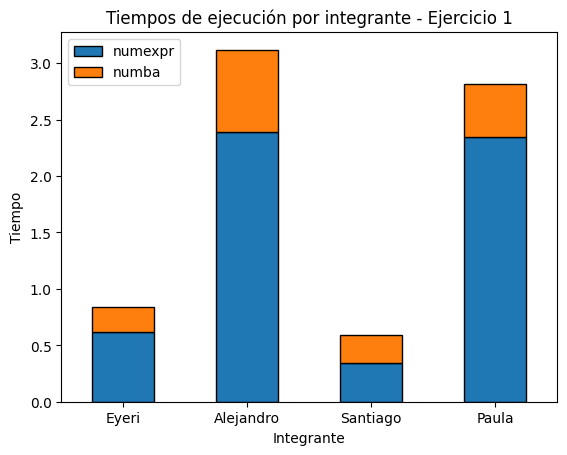

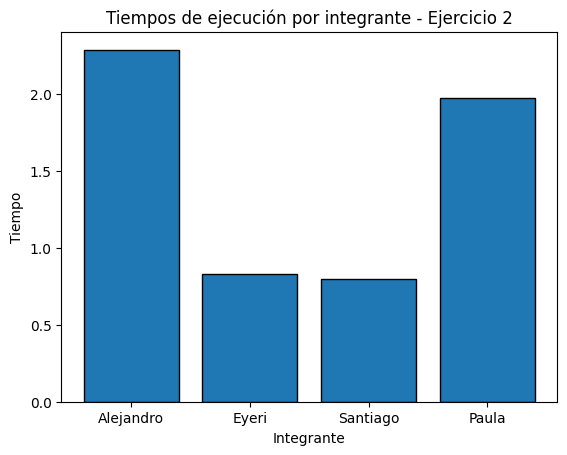

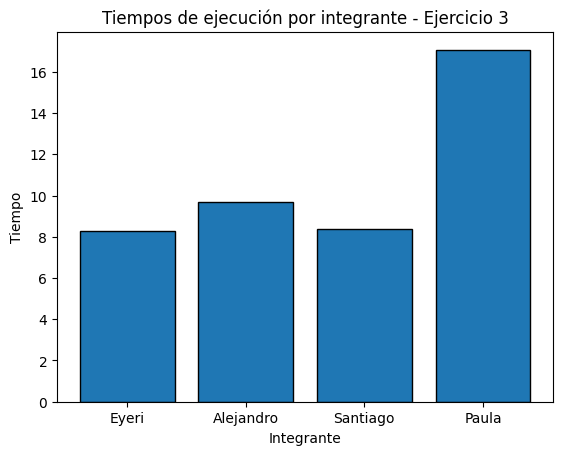

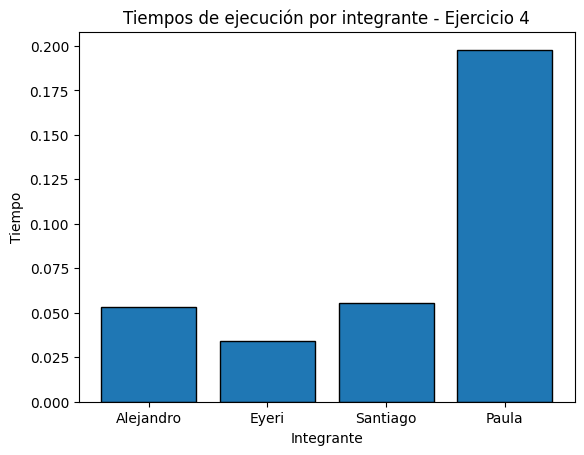

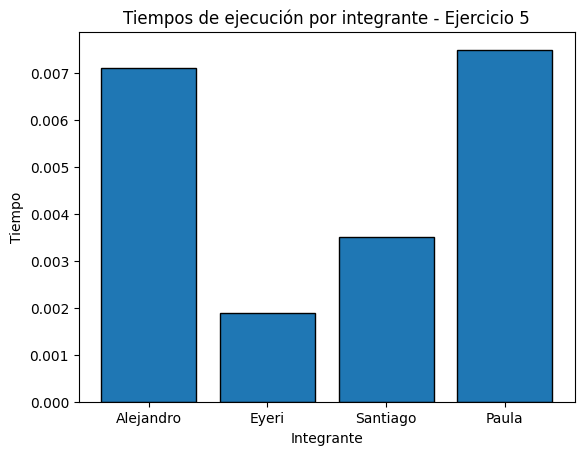

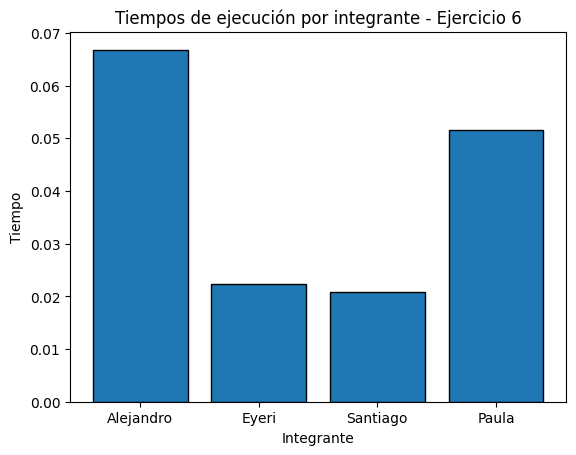

In [30]:
import matplotlib.pyplot as plt

lista_tiempos = [tiempos_ej_1, tiempos_ej_2, tiempos_ej_3, tiempos_ej_4, tiempos_ej_5, tiempos_ej_6]

for indice, tiempos_ej in enumerate(lista_tiempos):

    if tiempos_ej.shape[1] > 2:

        tiempos_ej.set_index('integrante').plot(kind = 'bar', stacked = True, edgecolor = 'black')

    else:
        
        plt.bar(tiempos_ej['integrante'], tiempos_ej['tiempo_promedio'], edgecolor = 'black')

    plt.xlabel('Integrante')
    
    plt.ylabel('Tiempo')
    
    plt.title(f'Tiempos de ejecución por integrante - Ejercicio {indice + 1}')
    
    plt.xticks(rotation = 0)

    plt.show()